<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson-tcb/blob/master/L02_TrainDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

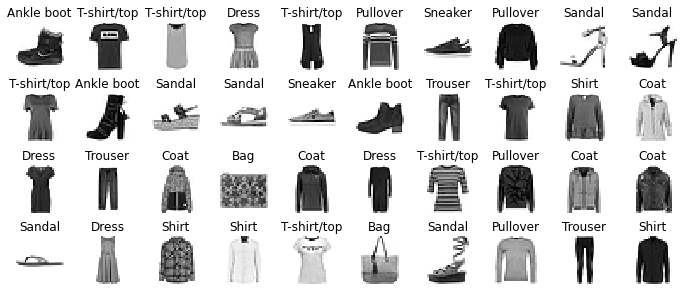

## 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

2024-06-09 08:24:23.696619: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-09 08:24:23.721221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 08:24:23.721279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 08:24:23.722318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-09 08:24:23.728847: I tensorflow/core/platform/cpu_feature_guar

### Información de versiones

In [2]:
tf.__version__

'2.15.0'

### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

2024-06-09 08:24:32.152621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-09 08:24:32.176876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-09 08:24:32.177816: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

**¡AHORA TÚ!**
- Repasa el notebook de la sesión anterior y averiguar si tenemos que hacer algún otro paso importante con el dataset

In [6]:
## SOLUTION
# Falta normalizar los datos. Si no se hace la red puede no converger bien
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

## 2. Entrenamiento

### Modelo 'base' de red neuronal

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2024-06-09 08:24:53.545114: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-09 08:24:53.608781: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb5dcb6fa60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-09 08:24:53.608811: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-06-09 08:24:53.617190: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1717914293.653719   13772 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 8s 4ms/step - loss: 2.2858 - accuracy: 0.2288 - val_loss: 2.2414 - val_accuracy: 0.3872
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2153 - accuracy: 0.4346 - val_loss: 2.1889 - val_accuracy: 0.5086
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1588 - accuracy: 0.4981 - val_loss: 2.1280 - val_accuracy: 0.5082
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0923 - accuracy: 0.5194 - val_loss: 2.0562 - val_accuracy: 0.5282
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0131 - accuracy: 0.5385 - val_loss: 1.9705 - val_accuracy: 0.5106
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.9214 - accuracy: 0.5448 - val_loss: 1.8733 - val_accuracy: 0.5444
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.8213 - accuracy: 0.5502 - val_loss: 1.7707 - val_accuracy: 0.5880
Epo

- Observa que en cada _epoch_ se ejecuta un número de _steps_ de entrenamiento igual a 1719. ¿Sabes explicar qué les ocurre a los parámetros de la red en cada _step_ del entrenamiento?
- El número de _steps_ depende de:
 - El tamaño del _batch_ que se utilice (en Keras se utiliza 32 por defecto).
 - El número de muestras de entrenamiento. 
- Por tanto, podemos calcular el número de _steps_ de la siguiente manera:

In [10]:
import math
batch_size = 32
n_epochs = 30
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
print(n_steps_per_epoch)

1719


In [11]:
# SOLUTION
# Al final de cada step se actualizan los parámetros de la red neuronal a partir del gradiente calculado para el batch en cuestión

**¡AHORA TÚ!**
- ¿Qué tal ha ido el entrenamiento anterior con la función _sigmoid_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy`? 
- Muestra una gráfica con la evolución del entrenamiento a lo largo de los epochs.




In [13]:
#TODO

In [12]:
## SOLUTION
# - Después de las primeras 10 epochs se consigue un val_accuracy de entorno al 60%, pero con otras 10 epochs llegamos a 75%. 
# Con más epochs tiende a estancarse.

Saving figure L01_FashionMnist_1layer


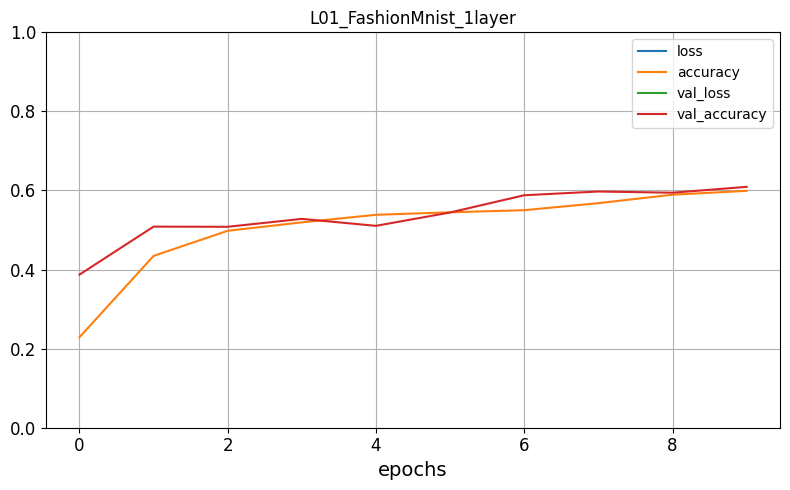

In [12]:
#SOLUTION
print_history(history,"L01_FashionMnist_1layer")
#La red está subajustando

**¡AHORA TÚ!**
- ¿Cómo evolucionará el entrenamiento con más _epochs_? ¿Qué valores se alcanzan de `accuracy` y de `val_accuracy` para 20 _epochs_? 
- Prueba a seguir entrenando ejecutando de nuevo la celda siguiente. Date cuenta de que estaremos reentrenando por otras 10 epochs.

In [14]:
history2 = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4601 - accuracy: 0.6119 - val_loss: 1.4217 - val_accuracy: 0.6394
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3926 - accuracy: 0.6262 - val_loss: 1.3571 - val_accuracy: 0.6420
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3333 - accuracy: 0.6360 - val_loss: 1.3000 - val_accuracy: 0.6510
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2812 - accuracy: 0.6425 - val_loss: 1.2501 - val_accuracy: 0.6606
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2349 - accuracy: 0.6539 - val_loss: 1.2055 - val_accuracy: 0.6562
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1936 - accuracy: 0.6558 - val_loss: 1.1652 - val_accuracy: 0.6812
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1565 - accuracy: 0.6677 - val_loss: 1.1295 - val_accuracy:

Text(0.5, 0, 'epochs')

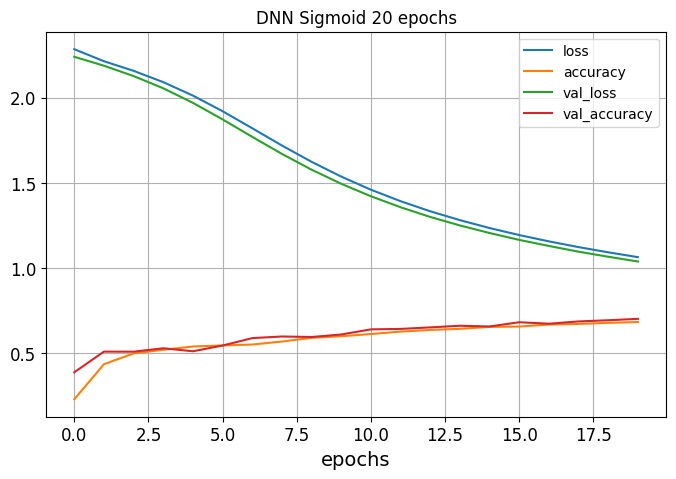

In [25]:

total_history = pd.concat([pd.DataFrame(history.history), pd.DataFrame(history2.history)], axis=0,ignore_index=True)
total_history = total_history.reindex()
total_history.plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title("DNN Sigmoid 20 epochs")
plt.xlabel("epochs")

### Funciones de activación y learning rate

- Observa, a continuación, las diferentes funciones de activación disponibles en Keras

In [16]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

**¡AHORA TÚ!**
- Prueba a entrenar la red con activaciones `tanh` o `relu` en lugar de `sigmoid`.
- Compara las gráfica de entrenamiento con el modelo anterior.

In [26]:
#TODO MODEL DEFINITION

In [ ]:
#TODO MODEL COMPILE

In [ ]:
#TODO MODEL TRAIN

In [ ]:
#SOLUTION
## SOLUTION
# - Con sigmoid aprende más despacio. 
# - Con tanh en 10 epochs llegamos a 83%. Con 20 epochs a 84%.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [27]:
#SOLUTION
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 1.4552 - accuracy: 0.5852 - val_loss: 0.9668 - val_accuracy: 0.7070
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8537 - accuracy: 0.7305 - val_loss: 0.7510 - val_accuracy: 0.7582
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7203 - accuracy: 0.7652 - val_loss: 0.6664 - val_accuracy: 0.7754
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6533 - accuracy: 0.7838 - val_loss: 0.6162 - val_accuracy: 0.7916
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6102 - accuracy: 0.7982 - val_loss: 0.5794 - val_accuracy: 0.8026
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5788 - accuracy: 0.8074 - val_loss: 0.5540 - val_accuracy: 0.8116
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5551 - accuracy: 0.8148 - val_loss: 0.5340 - val_accuracy

Saving figure L02_relutraining


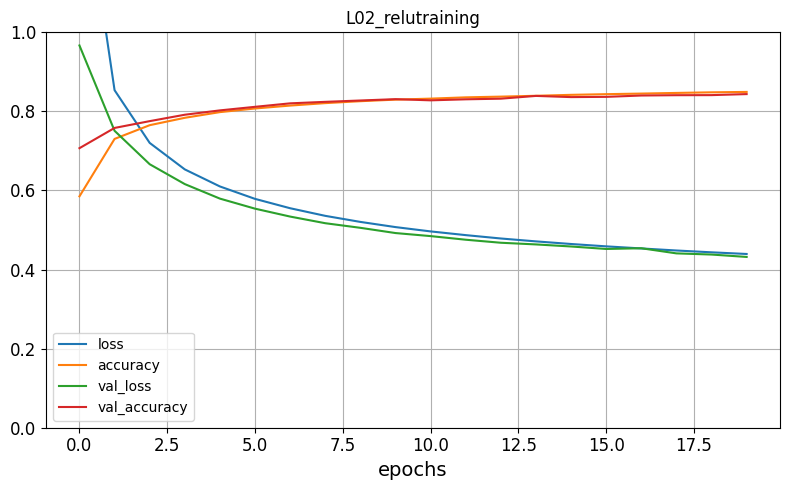

In [28]:
print_history(history,"L02_relutraining")

**¡AHORA TÚ!**
- Utilizando `relu`como función de activación
- ¿Qué ocurre si usamos `learning_rate` 1e-2 durante 35 epochs? 
- Muestra una gráfica y comprueba si se produce sobre-entrenamiento  

In [ ]:
#TODO

In [29]:
## SOLUTION
# - En las pruebas anteriores, en principio no llega a sobre-entrenar
# - Disminuyendo el learning rate aprende más rápido y aumentándolo más despacio
# - Con 35 epochs y 1e-2 empieza a detectarse overfitting. Si bajamos a 1e-3 y mantenemos 35 epochs ya no sobre-entrena
# y podríamos seguir más epochs
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

In [30]:
#SOLUTION
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=35,
                    validation_data=(X_valid, y_valid))

Epoch 1/35
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7273 - accuracy: 0.7595 - val_loss: 0.5224 - val_accuracy: 0.8162
Epoch 2/35
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4942 - accuracy: 0.8292 - val_loss: 0.4458 - val_accuracy: 0.8412
Epoch 3/35
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4480 - accuracy: 0.8448 - val_loss: 0.4248 - val_accuracy: 0.8430
Epoch 4/35
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4193 - accuracy: 0.8541 - val_loss: 0.4227 - val_accuracy: 0.8530
Epoch 5/35
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3990 - accuracy: 0.8607 - val_loss: 0.4092 - val_accuracy: 0.8578
Epoch 6/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3817 - accuracy: 0.8663 - val_loss: 0.3836 - val_accuracy: 0.8628
Epoch 7/35
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3690 - accuracy: 0.8690 - val_loss: 0.3738 - val_accuracy:

Saving figure L02_relutraining_lr1e-2


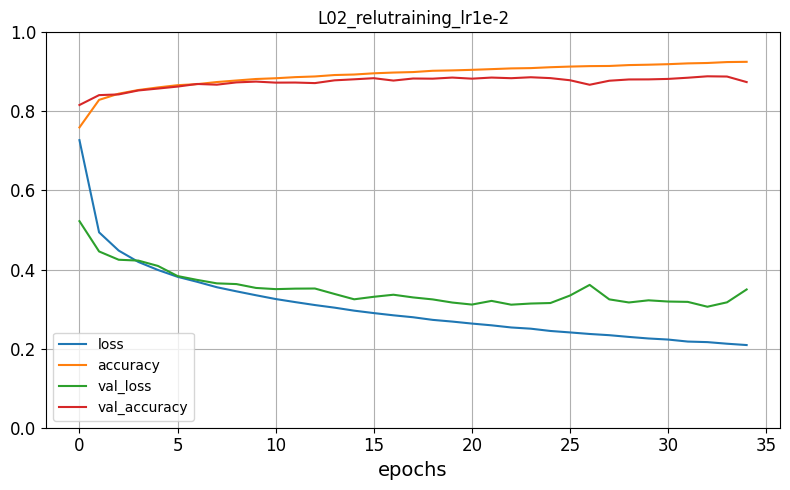

In [31]:
print_history(history,"L02_relutraining_lr1e-2")

### Batch normalization

En la teoría vimos cómo la técnica de _Batch Normalization_ consigue entrenamientos más estables. Las ventajas son las siguientes:
- Reduce el problema de desvanecimiento de gradiente.
- Permite usar tasas de aprendizaje mayores.
- Permite una convergencia de la red más rápida.
- Actúa como técnica de regularización.

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 300)               235200    
                                                                 
 batch_normalization_7 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 300)               0         
                                                                 
 dense_19 (Dense)            (None, 100)              

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0644 - accuracy: 0.6691 - val_loss: 0.6834 - val_accuracy: 0.7796
Epoch 2/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6768 - accuracy: 0.7824 - val_loss: 0.5587 - val_accuracy: 0.8124
Epoch 3/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5888 - accuracy: 0.8064 - val_loss: 0.5042 - val_accuracy: 0.8272
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5414 - accuracy: 0.8187 - val_loss: 0.4722 - val_accuracy: 0.8352
Epoch 5/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5134 - accuracy: 0.8283 - val_loss: 0.4500 - val_accuracy: 0.8384
Epoch 6/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4880 - accuracy: 0.8348 - val_loss: 0.4344 - val_accuracy: 0.8452
Epoch 7/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4697 - accuracy: 0.8408 - val_loss: 0.4217 - val_ac

Saving figure L02_relutraining_batch


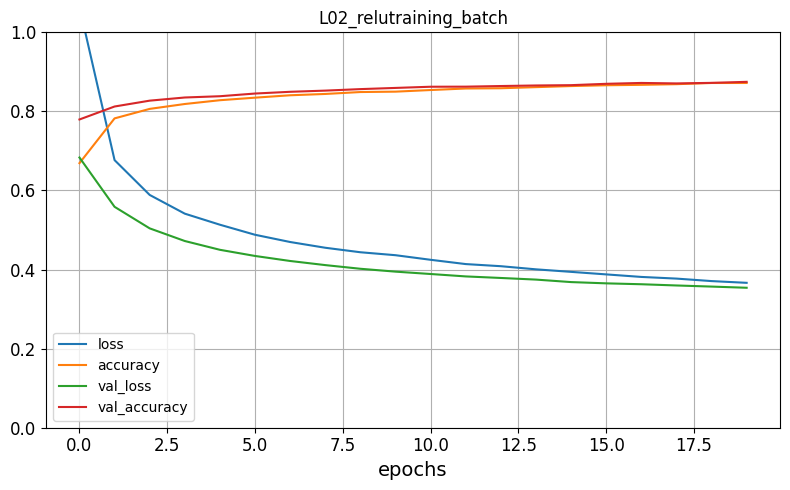

In [40]:
print_history(history,"L02_relutraining_batch")

**¡AHORA TÚ!**
- Observa que al utilizar capas `BatchNormalization()` ya no es necesario que las capas intermedias de la red tengan un término de bias, por lo que no lo incluimos en la definición de nuestra red. Debe aplicarse antes de la función de activación.
- ¿Cómo se explica que el número de parámetros pase de 0 a 3136 en la segunda capa? ¿Cómo se calcula el número de parámetros de las capas con _batch_normalization_?
- ¿Ha mejorado el rendimiento respecto al otro entrenamiento que hicimos con funciones `relu`, `learning_rate=1e-3` y `epochs=20` pero sin _batch_normalization_?

In [42]:
#SOLUTION
#Cada neurona/entrada necesita 4 parámetros adicionales con batch normalization: 2 entrenables y 2 no entrenables. Había 784 entradas x 4
#Hemos pasado a un val_accuracy de 87% y antes conseguíamos 84%

In [31]:
## PRIVATE
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

### Optimizadores

- Hasta ahora solamente hemos utilizado SGD como optimizador. 
- Observa algunas otras opciones disponibles en Keras.
- También es posible pasar como parámetro a `model.compile(optimizer='adam',...)` el nombre del optimizador para utilizar los parámetros por defecto

```
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
```

**¡AHORA TÚ!**
- Utilizando la siguiente red, prueba uno dos optimizadores (Por ejemplo _RMSProp_ y _Adam_) y compara la evolución del entrenamiento a lo largo de unas 15 ó 20 `epochs`, respecto a lo que ocurría con SGD.

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_12 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_24 (Dense)            (None, 300)               235200    
                                                                 
 batch_normalization_13 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 activation_8 (Activation)   (None, 300)               0         
                                                                 
 dense_25 (Dense)            (None, 100)              

In [52]:
#TODO MODEL COMPILE

In [53]:
#TODO MODEL TRAIN

In [54]:
#SOLUTION
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [55]:
#SOLUTION
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4637 - accuracy: 0.8337 - val_loss: 0.3551 - val_accuracy: 0.8638
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3564 - accuracy: 0.8672 - val_loss: 0.3791 - val_accuracy: 0.8588
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3173 - accuracy: 0.8830 - val_loss: 0.3116 - val_accuracy: 0.8836
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2932 - accuracy: 0.8908 - val_loss: 0.3251 - val_accuracy: 0.8778
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2745 - accuracy: 0.8978 - val_loss: 0.3023 - val_accuracy: 0.8842
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2555 - accuracy: 0.9043 - val_loss: 0.2999 - val_accuracy: 0.8918
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2423 - accuracy: 0.9085 - val_loss: 0.3174 - val_ac

Saving figure L02_relutraining_batch_adam


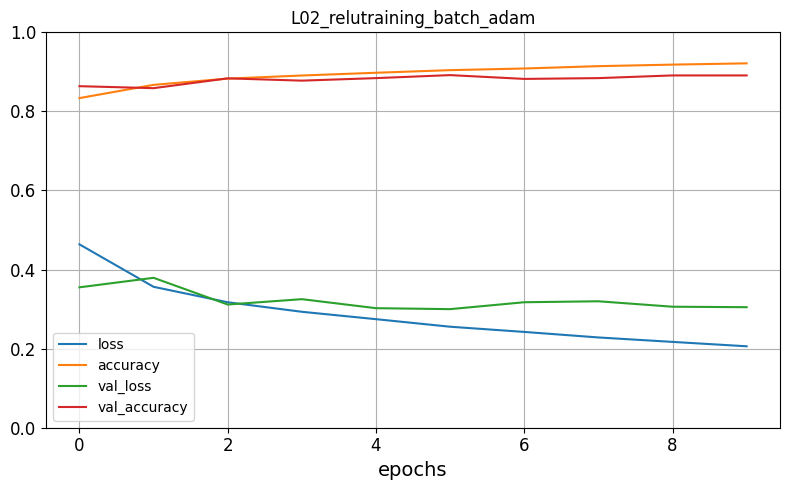

In [56]:
print_history(history,"L02_relutraining_batch_adam")

- Observa que con estos optimizadores en menos épocas es posible llegar a tasas de acierto similares
- Los casos de sobreaprendizaje se observan antes también 

# 3. Test

In [57]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Loss y accuracy

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8883


[0.3319621682167053, 0.8883000016212463]

### Matriz de confusión

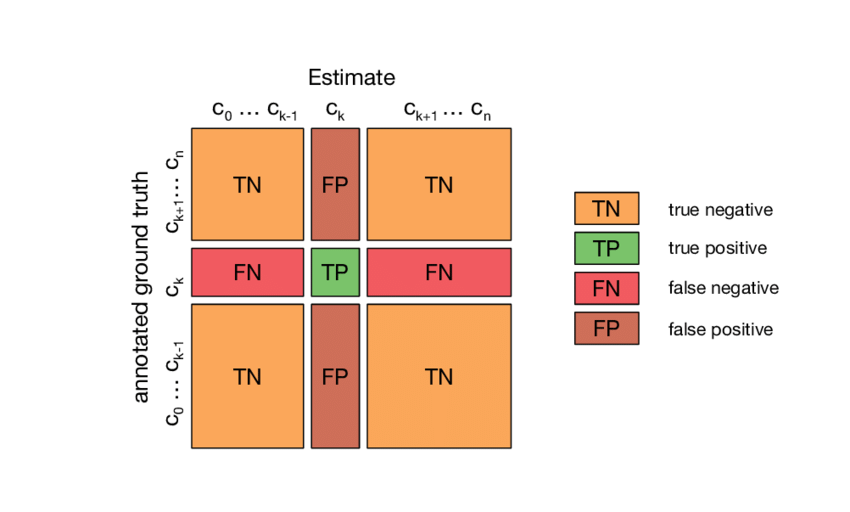

In [60]:
y_true = y_test
y_pred = np.argmax(model.predict(X_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [61]:
print(y_true)
print(y_pred)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [62]:
confnorm = confusion_matrix(y_true, y_pred,normalize='true')

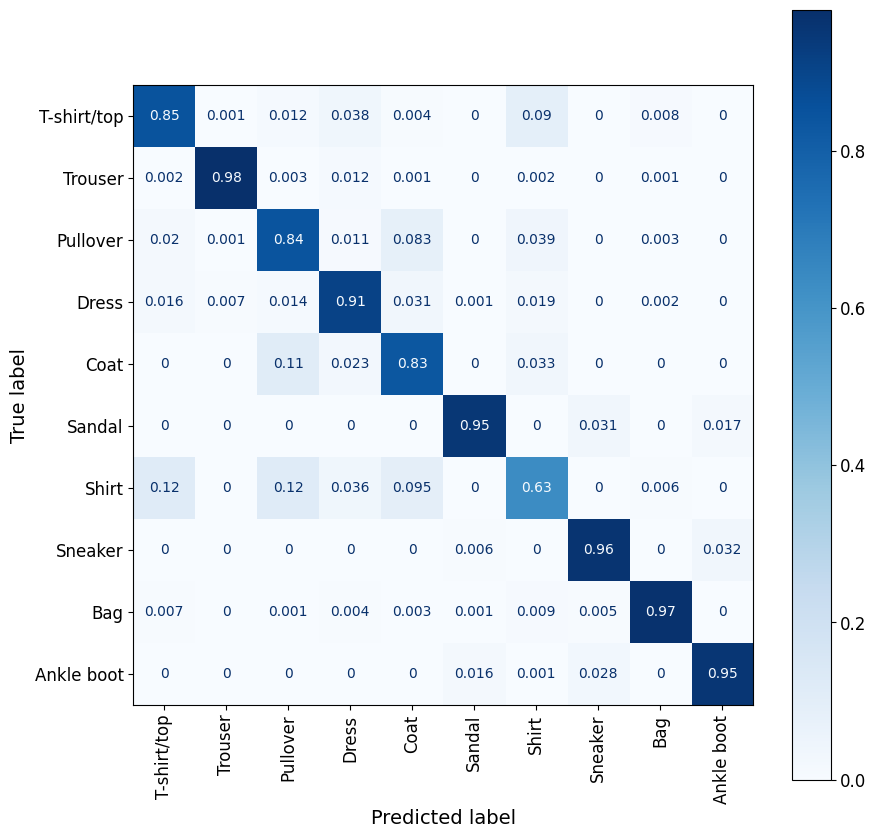

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la diagonal de la matriz de confusión normalizada:
   - Indica cuál ha sido la clase que mejor se ha predicho y el porcentaje de muestras correctamente clasificadas.
   - Indica cuál ha sido la clase que peor se ha predicho y el porcentaje de muestras correctamente clasificadas.


In [64]:
# SOLUTION
# En mi caso la mejor ha sido Sneaker con un 98% de muestras correctamente clasificadas
# La peor ha sido Shirt con un 74%

In [65]:
conf = confusion_matrix(y_true, y_pred)

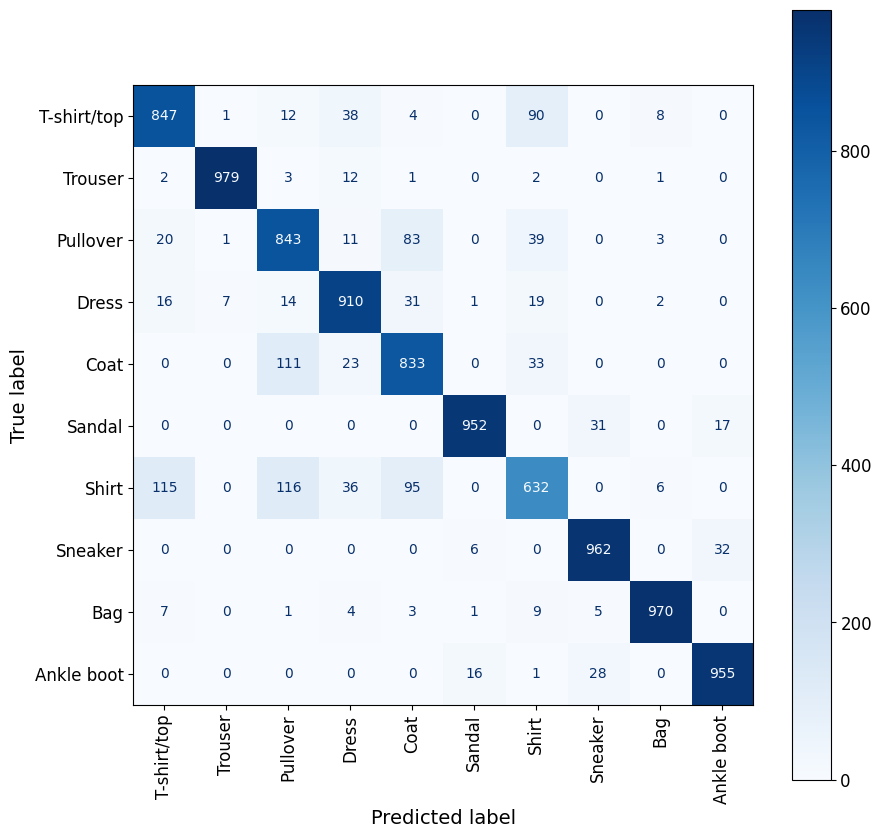

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- En la matriz de confusión las clases verdaderas se indican a la izquierda y las clases predichas en la parte superior. 
- Mirando la matriz de confusión sin normalizar, responde:
   - True Positives (TP): ¿Cuántas muestras de test se han clasificado correctamente para la clase que mejor se ha predicho y cuántas para la clase que peor se ha predicho?
   - False Negatives (FN): Para las muestras que pertenecen a la clase peor predicha, ¿con qué otras clases se han clasificado erróneamente?. Tendrás que buscar en una de las filas de la matriz.
   - False Positives (FP): ¿Las muestras de qué otras clases se han clasificado erroneamente como pertenecientes a dicha clase?. Tendrás que buscar en una de las columnas de la matriz.

In [1]:
# SOLUTION

# True positives (TP)
# Clase con mayor TP: Sneaker con 980
# Clase con menor TP: Shirt con 685

# False negatives (FN) para Shirt
# 122 predicciones erróneas como  T-shirt/Top, 4 como Trouser, 76 como Pullover, 28 como Dress, 63 como Coat, 22 como Bag

# False positives (FP) para Shirt
# 97 muestras clasificadas erróneamente como de T-shirt/Top, 2 como Trouser, 62 como Pullover, 28 como Dress, 55 como Coat, 5 Bag, 1 Ankle Bot clasificadas como Shirt

